In [3]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Rajarshi Basak\Study_Metarials\Machine Learning\Machine Learning\Machine Learning A-Z Dataset\Part 8 - Deep Learning\Section 39 - Artificial Neural Networks (ANN)\Python\Churn_Modelling.csv")
print(data.iloc[:,3:].head())

X = data.iloc[:,3:13].values
y = data.iloc[:,13].values

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder = LabelEncoder()
X[:,2] = encoder.fit_transform(X[:,2:3])
encoder = ColumnTransformer(transformers=[("Encoder",OneHotEncoder(),[1])],remainder="passthrough")
X = encoder.fit_transform(X)
X = X[:,1:]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\Rajarshi Basak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#building ANN model

from tf_keras.models import Sequential
from tf_keras.layers import Dense

classifier = Sequential()
#add input layer
#classifier.add(tf.keras.Input(shape=11))
#add two hidden layer
classifier.add(Dense(units=6, kernel_initializer="uniform",activation="relu"))
classifier.add(Dense(units=6, kernel_initializer="uniform",activation="relu"))
#add output layer
classifier.add(Dense(units=1, kernel_initializer="uniform",activation="sigmoid"))
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

classifier.fit(X_train, y_train,batch_size=10,epochs=20)
y_pred = (classifier.predict(X_test) > 0.5)




Epoch 1/20


800/800 [==============================] - 1s 719us/step - loss: 0.4848 - accuracy: 0.7951
Epoch 2/20
800/800 [==============================] - 1s 705us/step - loss: 0.4269 - accuracy: 0.7960
Epoch 3/20
800/800 [==============================] - 1s 704us/step - loss: 0.4218 - accuracy: 0.7993
Epoch 4/20
800/800 [==============================] - 1s 707us/step - loss: 0.4184 - accuracy: 0.8220
Epoch 5/20
800/800 [==============================] - 1s 718us/step - loss: 0.4160 - accuracy: 0.8270
Epoch 6/20
800/800 [==============================] - 1s 740us/step - loss: 0.4144 - accuracy: 0.8289
Epoch 7/20
800/800 [==============================] - 1s 731us/step - loss: 0.4132 - accuracy: 0.8298
Epoch 8/20
800/800 [==============================] - 1s 722us/step - loss: 0.4117 - accuracy: 0.8316
Epoch 9/20
800/800 [==============================] - 1s 720us/step - loss: 0.4107 - accuracy: 0.8324
Epoch 10/20
800/800 [==============================] - 1s 791us/step - loss: 

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

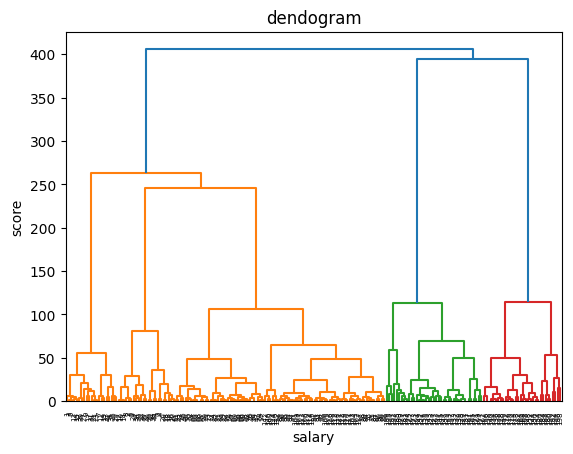

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


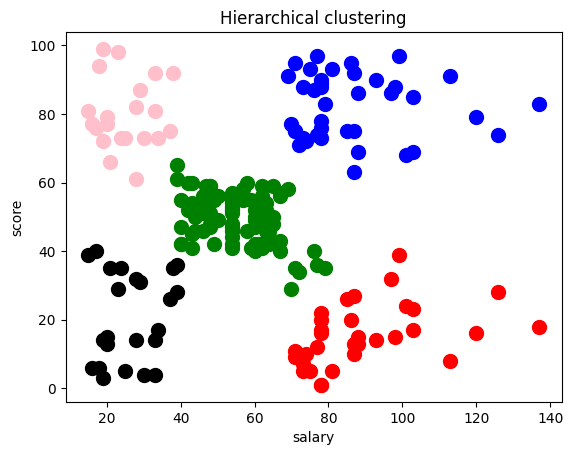

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Rajarshi Basak\Study_Metarials\Machine Learning\Machine Learning\Machine Learning A-Z Dataset\Part 4 - Clustering\Section 24 - K-Means Clustering\Python\Mall_Customers.csv")
X = df.iloc[:,[3,4]].values
print(X)

import scipy.cluster.hierarchy as hc
hc.dendrogram(hc.linkage(X,method="ward"))
plt.title("dendogram")
plt.xlabel("salary")
plt.ylabel("score")
plt.show()

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5,linkage="ward")
y_pred = ac.fit_predict(X)
print(y_pred)

plt.scatter(X[y_pred==0,0], X[y_pred==0,1],s=100,c="red",label="cluster 1")
plt.scatter(X[y_pred==1,0], X[y_pred==1,1],s=100,c="green",label="cluster 2")
plt.scatter(X[y_pred==2,0], X[y_pred==2,1],s=100,c="blue",label="cluster 3")
plt.scatter(X[y_pred==3,0], X[y_pred==3,1],s=100,c="pink",label="cluster 4")
plt.scatter(X[y_pred==4,0], X[y_pred==4,1],s=100,c="black",label="cluster 5")
plt.title("Hierarchical clustering")
plt.xlabel("salary")
plt.ylabel("score")
plt.show()